In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('~/Downloads/amazon_reviews_us_Watches_v1_00.tsv', 
                 delimiter='\t',
                 error_bad_lines=False)

b'Skipping line 8704: expected 15 fields, saw 22\nSkipping line 16933: expected 15 fields, saw 22\nSkipping line 23726: expected 15 fields, saw 22\n'
b'Skipping line 85637: expected 15 fields, saw 22\n'
b'Skipping line 132136: expected 15 fields, saw 22\nSkipping line 158070: expected 15 fields, saw 22\nSkipping line 166007: expected 15 fields, saw 22\nSkipping line 171877: expected 15 fields, saw 22\nSkipping line 177756: expected 15 fields, saw 22\nSkipping line 181773: expected 15 fields, saw 22\nSkipping line 191085: expected 15 fields, saw 22\nSkipping line 196273: expected 15 fields, saw 22\nSkipping line 196331: expected 15 fields, saw 22\n'
b'Skipping line 197000: expected 15 fields, saw 22\nSkipping line 197011: expected 15 fields, saw 22\nSkipping line 197432: expected 15 fields, saw 22\nSkipping line 208016: expected 15 fields, saw 22\nSkipping line 214110: expected 15 fields, saw 22\nSkipping line 244328: expected 15 fields, saw 22\nSkipping line 248519: expected 15 fields,

In [3]:
# sample top of the dataset
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31


In [4]:
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,9.602040e+05,9.602040e+05,960204.000000,960204.000000,960204.000000
mean,2.600101e+07,5.060448e+08,4.138161,1.197180,1.561571
std,1.581616e+07,2.864151e+08,1.293327,8.163426,9.071388
min,1.001600e+04,4.384000e+03,1.000000,0.000000,0.000000
25%,1.280548e+07,2.588358e+08,4.000000,0.000000,0.000000
50%,2.396748e+07,5.166657e+08,5.000000,0.000000,0.000000
75%,4.108624e+07,7.491827e+08,5.000000,1.000000,1.000000
max,5.309646e+07,9.999979e+08,5.000000,4004.000000,4249.000000


In [5]:
print('Unique Customers: {}'.format(len(df.customer_id.unique())))
print('Unique Products: {}'.format(len(df.product_id.unique())))

Unique Customers: 719522
Unique Products: 149658


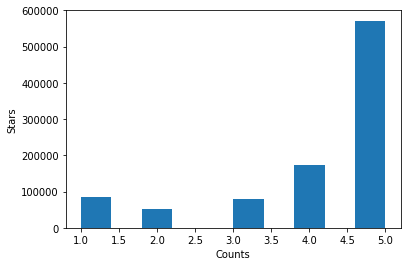

In [6]:
# distribution of stars ratings in reviews
plt.hist(df.star_rating)
plt.xlabel('Star Rating')
plt.ylabel('Counts')
plt.show()

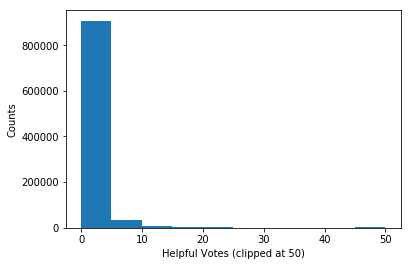

In [39]:
# distribution of helpful votes in reviews
plt.hist(np.clip(df.helpful_votes, 0, 50))
plt.xlabel('Helpful Votes (clipped at 50)')
plt.ylabel('Counts')
plt.show()

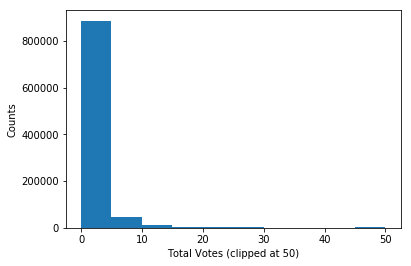

In [42]:
# distribution of total votes in reviews
plt.hist(np.clip(df.total_votes, 0, 50))
plt.xlabel('Total Votes (clipped at 50)')
plt.ylabel('Counts')
plt.show()

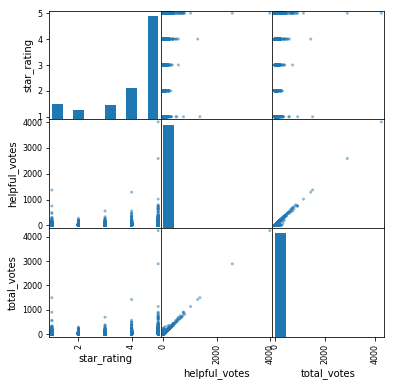

In [49]:
# this cell will take some time to run (plotting all values in correlation matrix)
pd.plotting.scatter_matrix(df[['star_rating', 'helpful_votes', 'total_votes']], figsize=(6, 6))
plt.show()

In [7]:
# top star_rating with no filter
df.groupby('product_id').agg(['mean', 'count']).sort_values([('star_rating', 'mean')], ascending=False).head(10)

customer_id       product_parent       star_rating        \
                  mean count           mean count        mean count   
product_id                                                            
1380137136  51483206.0     1    518987366.0     1         5.0     1   
B007K1PCIW  16660137.0     1    978864006.0     1         5.0     1   
B007K7EF5W   8478905.0     1    874242421.0     1         5.0     1   
B007K5B71Y  35689437.5     2    241411351.0     2         5.0     2   
B007K5B6Z6  33458367.0     1    621913171.0     1         5.0     1   
B007K5B3WM  45187237.0     1    786395679.0     1         5.0     1   
B007K5B3VS  17952767.0     1    874974768.0     1         5.0     1   
B007K44OWE   6537352.0     1     80314280.0     1         5.0     1   
B007K447YY  31932434.0     1    503003533.0     1         5.0     1   
B007JYU424  37287899.0     2    703415811.0     2         5.0     2   

           helpful_votes       total_votes        
                    mean count        mean count  
product_id                                        
1380137136           0.0     1         0.0     1  
B007K1PCIW           0.0     1         0.0     1  
B007K7EF5W           0.0     1         0.0     1  
B007K5B71Y           0.0     2         0.0     2  
B007K5B6Z6           0.0     1         0.0     1  
B007K5B3WM           0.0     1         0.0     1  
B007K5B3VS           0.0     1         0.0     1  
B007K44OWE           0.0     1         0.0     1  
B007K447YY           0.0     1         0.0     1  
B007JYU424           0.0     2         0.0     2

In [8]:
# Review date range
min_review_date = pd.to_datetime(df.review_date).min()
max_review_date = pd.to_datetime(df.review_date).max()
"Reviews are from {} to {}".format(min_review_date, max_review_date)

'Reviews are from 2001-04-05 00:00:00 to 2015-08-31 00:00:00'

In [9]:
# Top Tier: Products that appear at the very top of rankings
top_tier_search_sources = [
    'fashion-mens-watches-pg1.html',
    'fashion-mens-watches-pg2.html',
    'fashion-mens-watches-pg3.html',
]

# High Tier: Products that appear between Top Tier and Mid Tier of rankings
high_tier_search_sources = [
    'fashion-mens-watches-pg100.html',
    'fashion-mens-watches-pg101.html',
    'fashion-mens-watches-pg102.html',
]

# Mid Tier: Products that appear at the middle of rankings
mid_tier_search_sources = [
    'fashion-mens-watches-pg200.html',
    'fashion-mens-watches-pg201.html',
    'fashion-mens-watches-pg202.html',
]

# Low Tier: Products that appear between Mid Tier and Bottom Tier of rankings
low_tier_search_sources = [
    'fashion-mens-watches-pg300.html',
    'fashion-mens-watches-pg301.html',
    'fashion-mens-watches-pg302.html',
]

# Bottom Tier: Products that appear at the bottom of rankings
bottom_tier_search_sources = [
    'fashion-mens-watches-pg398.html',
    'fashion-mens-watches-pg399.html',
    'fashion-mens-watches-pg400.html',
]

In [10]:
flatten = lambda l: [item for sublist in l for item in sublist]

def get_product_ids_from_html(filepath):
    """ Function reads search results html source and returns the Amazon product_ids found """
    with open(filepath, 'r') as content_file:
        content = content_file.read()

    soup = BeautifulSoup(content, 'html.parser')
    product_ids = []
    item_sections = soup.select('[data-component-type="s-search-results"] div[data-asin]')
    nonsponsored_item_sections = [item_section for item_section in item_sections 
                                  if str(item_section).find('Sponsored') < 0]
    product_ids = [item.get('data-asin') for item in nonsponsored_item_sections]
    return product_ids

def get_tier_product_ids(tier_search_sources):
    """ Returns product_ids from tier search sources """
    return flatten([get_product_ids_from_html(os.path.join('RankingData', x)) for x in tier_search_sources])

In [11]:
# Get product_ids for each tier
top_tier_product_ids = get_tier_product_ids(top_tier_search_sources)
high_tier_product_ids = get_tier_product_ids(high_tier_search_sources)
mid_tier_product_ids = get_tier_product_ids(mid_tier_search_sources)
low_tier_product_ids = get_tier_product_ids(low_tier_search_sources)
bottom_tier_product_ids = get_tier_product_ids(bottom_tier_search_sources)

In [12]:
# Display samples from top tier
top_tier_df = df[df.product_id.isin(top_tier_product_ids)].groupby('product_id').agg(['mean', 'count'])
top_tier_df.sample(10)

customer_id       product_parent       star_rating        \
                    mean count           mean count        mean count   
product_id                                                              
B00PXVU3GM  2.638929e+07    12      681288878    12    4.833333    12   
B005OAO20U  1.963296e+07   361      145657838   361    4.703601   361   
B00KCF7F10  1.836832e+07    28      347426449    28    4.642857    28   
B0072C8SMQ  3.406887e+07    11      613506265    11    4.727273    11   
B00KCF7JPM  2.648964e+07    22      906519595    22    4.636364    22   
B003URSIKO  2.323641e+07   136       83702735   136    4.772059   136   
B00CQHFHIU  8.277730e+06     2      373186883     2    3.000000     2   
B0036DDEJC  2.138791e+07    11      779614297    11    4.727273    11   
B000GAYQKY  2.741807e+07  1254      282878315  1254    4.628389  1254   
B0048F24DY  2.039152e+07    14      985939004    14    4.928571    14   

           helpful_votes       total_votes        
                    mean count        mean count  
product_id                                        
B00PXVU3GM     12.500000    12   13.666667    12  
B005OAO20U      0.858726   361    1.113573   361  
B00KCF7F10      1.785714    28    2.892857    28  
B0072C8SMQ     10.272727    11   15.181818    11  
B00KCF7JPM      1.590909    22    1.863636    22  
B003URSIKO      1.522059   136    1.933824   136  
B00CQHFHIU      5.500000     2    6.000000     2  
B0036DDEJC      4.090909    11    4.454545    11  
B000GAYQKY      2.065391  1254    2.722488  1254  
B0048F24DY      2.071429    14    2.428571    14

In [13]:
# Display samples from high tier
high_tier_df = df[df.product_id.isin(high_tier_product_ids)].groupby('product_id').agg(['mean', 'count'])
high_tier_df.sample(10)

customer_id       product_parent       star_rating        \
                    mean count           mean count        mean count   
product_id                                                              
B00HLVH1GW  2.514136e+07    89      291192287    89    4.303371    89   
B0047PJLLI  2.237931e+07   203      230661200   203    4.669951   203   
B00ILJF8R2  2.643381e+07    11      931181364    11    4.636364    11   
B000VGZ6FC  1.615050e+07    17      393787180    17    4.117647    17   
B00EZQN37W  2.381376e+07   107      579675624   107    4.028037   107   
B00443B63Y  2.622297e+07    36      706086798    36    4.500000    36   
B002NSMFH8  2.546645e+07    20      477946423    20    4.600000    20   
B006OPV20M  3.822944e+07     3      247935612     3    3.666667     3   
B004FPMOVY  1.141698e+07     2      748459594     2    5.000000     2   
B0009P66TK  2.656424e+07   144      875833627   144    4.458333   144   

           helpful_votes       total_votes        
                    mean count        mean count  
product_id                                        
B00HLVH1GW      1.314607    89    1.786517    89  
B0047PJLLI      1.433498   203    1.802956   203  
B00ILJF8R2      3.181818    11    3.272727    11  
B000VGZ6FC      0.588235    17    1.176471    17  
B00EZQN37W      1.000000   107    1.214953   107  
B00443B63Y      0.861111    36    1.222222    36  
B002NSMFH8      0.600000    20    0.850000    20  
B006OPV20M      0.666667     3    1.000000     3  
B004FPMOVY      1.000000     2    1.000000     2  
B0009P66TK      0.923611   144    1.250000   144

In [14]:
# Display samples from mid tier
mid_tier_df = df[df.product_id.isin(mid_tier_product_ids)].groupby('product_id').agg(['mean', 'count'])
mid_tier_df.sample(10)

customer_id       product_parent       star_rating        \
                    mean count           mean count        mean count   
product_id                                                              
B00B78WQXI  2.657067e+07    12      831124906    12    4.333333    12   
B00BXCAVN0  2.492911e+07     3      861815214     3    4.666667     3   
B006ZMGWPY  3.192320e+07     1       13132435     1    4.000000     1   
B00I3UXU5Q  4.926750e+07     1      566883067     1    4.000000     1   
B003LUSBKC  3.888948e+07     2      354305258     2    4.500000     2   
B003VX0IV4  1.882427e+07     2       87844768     2    4.500000     2   
B009NVMOCE  9.058570e+05     1      866164579     1    5.000000     1   
B0060JB1XA  2.548374e+07    10      691011956    10    4.100000    10   
B005KMEVUS  1.910794e+07     3       81773000     3    4.333333     3   
B00KH6WXBG  2.222900e+07     3      595839980     3    3.000000     3   

           helpful_votes       total_votes        
                    mean count        mean count  
product_id                                        
B00B78WQXI      0.333333    12    0.833333    12  
B00BXCAVN0      2.666667     3    2.666667     3  
B006ZMGWPY      4.000000     1    4.000000     1  
B00I3UXU5Q      4.000000     1    4.000000     1  
B003LUSBKC      0.000000     2    0.000000     2  
B003VX0IV4      2.000000     2    4.000000     2  
B009NVMOCE      0.000000     1    0.000000     1  
B0060JB1XA      1.200000    10    2.200000    10  
B005KMEVUS      0.666667     3    1.000000     3  
B00KH6WXBG      3.000000     3    4.000000     3

In [15]:
# Display samples from low tier
low_tier_df = df[df.product_id.isin(low_tier_product_ids)].groupby('product_id').agg(['mean', 'count'])
low_tier_df.sample(10)

customer_id       product_parent       star_rating        \
                    mean count           mean count        mean count   
product_id                                                              
B00H4J5NYI  1.517916e+07     4      356328817     4    4.500000     4   
B003KV2GTO  4.483423e+07     1      850039056     1    5.000000     1   
B006SICNWG  3.019081e+07    64      261656072    64    4.093750    64   
B00714V08Y  1.967950e+07     2      234785991     2    3.000000     2   
B00JK0WSUQ  3.230974e+07     3      269038717     3    4.333333     3   
B008O0VP16  1.951458e+07    50      951913077    50    4.040000    50   
B00H9J6OLY  3.336056e+07     1       42118224     1    5.000000     1   
B00CBK5O8A  2.543225e+07     3      223793936     3    4.333333     3   
B00DBXZDYQ  2.442518e+07    51      359501284    51    3.411765    51   
B00D40SDCU  2.166431e+07    17      155583810    17    4.117647    17   

           helpful_votes       total_votes        
                    mean count        mean count  
product_id                                        
B00H4J5NYI      0.000000     4    1.500000     4  
B003KV2GTO      3.000000     1    5.000000     1  
B006SICNWG      0.703125    64    0.843750    64  
B00714V08Y      0.500000     2    0.500000     2  
B00JK0WSUQ      1.000000     3    1.000000     3  
B008O0VP16      0.440000    50    0.540000    50  
B00H9J6OLY      1.000000     1    1.000000     1  
B00CBK5O8A      0.000000     3    1.000000     3  
B00DBXZDYQ      1.196078    51    1.666667    51  
B00D40SDCU      2.647059    17    2.823529    17

In [16]:
# Display samples from bottom tier
bottom_tier_df = df[df.product_id.isin(bottom_tier_product_ids)].groupby('product_id').agg(['mean', 'count'])
bottom_tier_df.sample(10)

customer_id       product_parent       star_rating        \
                  mean count           mean count        mean count   
product_id                                                            
B00BP0EY5G    49370545     1      770491171     1           5     1   
B00O8PMKMO     2365896     1      556767957     1           5     1   
B00GN2FUA4     3300052     1      726520800     1           5     1   
B00H7NEXA6    28152319     1       72019310     1           5     1   
B00MM7QNLE     2645244     1      352444862     1           5     1   
B00BCDWZMA    19807885     1      240400102     1           5     1   
B00EK0NVP2    33791192     1      980771630     1           5     1   
B00GJ7SCDA       83218     1      406871109     1           5     1   
B00DG9TCRY    20525184     1      235230900     1           5     1   
B00HGDLMXS     3678387     1      494349243     1           5     1   

           helpful_votes       total_votes        
                    mean count        mean count  
product_id                                        
B00BP0EY5G             0     1           0     1  
B00O8PMKMO             2     1           2     1  
B00GN2FUA4             0     1           1     1  
B00H7NEXA6             0     1           0     1  
B00MM7QNLE             4     1           4     1  
B00BCDWZMA             2     1           2     1  
B00EK0NVP2             0     1           0     1  
B00GJ7SCDA             0     1           0     1  
B00DG9TCRY             2     1           2     1  
B00HGDLMXS             0     1           0     1

In [17]:
def remove_column_hierarchy(tier_df):
    tier_df = tier_df.copy()
    tier_df.reset_index(inplace=True)
    tier_df.columns = ["_".join(c).strip('_') for c in tier_df.columns]
    return tier_df

def add_target(tier_df, target_value):
    tier_df = tier_df.copy()
    tier_df['target'] = target_value
    return tier_df

top_tier_dataset = add_target(remove_column_hierarchy(top_tier_df), 5.)
high_tier_dataset = add_target(remove_column_hierarchy(high_tier_df), 4.)
mid_tier_dataset = add_target(remove_column_hierarchy(mid_tier_df), 3.)
low_tier_dataset = add_target(remove_column_hierarchy(low_tier_df), 2.)
bottom_tier_dataset = add_target(remove_column_hierarchy(bottom_tier_df), 1.)

In [18]:
# create a training dataset
tier_training_dataset = pd.concat([top_tier_dataset, 
                                   high_tier_dataset,
                                   mid_tier_dataset,
                                   low_tier_dataset,
                                   bottom_tier_dataset])

tier_training_dataset.sample(10)

,product_id,customer_id_mean,customer_id_count,product_parent_mean,product_parent_count,star_rating_mean,star_rating_count,helpful_votes_mean,helpful_votes_count,total_votes_mean,total_votes_count,target
13,B002UUUPJO,1.790607e+07,2,285573704,2,4.500000,2,2.000000,2,3.000000,2,3.0
12,B000S3376I,2.485396e+07,13,10832821,13,4.538462,13,2.538462,13,2.769231,13,5.0
19,B003MZOK4C,3.309588e+07,1,488972024,1,5.000000,1,0.000000,1,0.000000,1,3.0
28,B0049HSJ76,2.313284e+07,251,166208114,251,4.681275,251,1.605578,251,2.111554,251,5.0
55,B00GOEZVW8,3.268187e+07,9,37273912,9,4.555556,9,2.222222,9,2.888889,9,3.0
9,B00ITF0F4E,3.521327e+07,1,774380807,1,5.000000,1,5.000000,1,5.000000,1,1.0
74,B00PT9MR2Q,3.046577e+07,2,531301478,2,4.500000,2,0.000000,2,0.500000,2,3.0
75,B00PXND7PE,1.935651e+07,3,882267848,3,4.666667,3,0.000000,3,0.000000,3,3.0
76,B00PXVV2IU,2.958964e+07,5,562531038,5,4.200000,5,1.600000,5,3.600000,5,3.0
70,B00MIJLQAY,1.800669e+07,88,392188094,88,3.863636,88,1.522727,88,2.068182,88,3.0


In [19]:
# select feature and target columns
training_features = ['customer_id_count', 'star_rating_mean', 'helpful_votes_mean', 'total_votes_mean']
training_target = ['target']

# scale input variables
scaler = StandardScaler()
scaler.fit(tier_training_dataset[training_features])
X = scaler.transform(tier_training_dataset[training_features])
y = tier_training_dataset[training_target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a model to learn from the dataset
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

# print best features
print("\ntop features:")
for coef in reversed(sorted(lasso.coef_)):
    if coef > 0:
        coef_index = list(lasso.coef_).index(coef)
        print("{} ({})".format(training_features[coef_index], coef))

training score: 0.29449968133734605
test score:  0.0693442022959132
number of features used:  4

top features:
customer_id_count (0.4217993051128214)
helpful_votes_mean (0.29451249808999075)
total_votes_mean (0.15805425941406773)
star_rating_mean (0.15695316399078257)


In [28]:
# Sample Predictions
predicted_values = np.clip(lasso.predict(X_test), 1., 5.)
predictions = np.array(list(zip(predicted_values, y_test.as_matrix().reshape(-1,))))
predictions[:10]

/Users/bear-mbp/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()


array([[4.34054755, 5.        ],
       [3.05824005, 4.        ],
       [3.27875741, 2.        ],
       [3.41455071, 2.        ],
       [3.26450872, 3.        ],
       [5.        , 5.        ],
       [4.73099329, 4.        ],
       [2.84604114, 3.        ],
       [3.09642754, 4.        ],
       [3.05770743, 3.        ]])

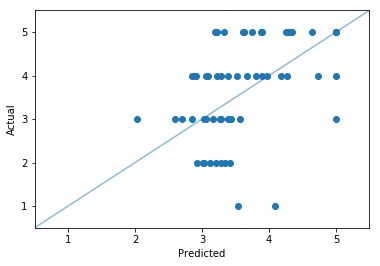

In [34]:
plt.scatter(predictions[:,0], predictions[:,1])
plt.plot([.5,5.5], [.5, 5.5], alpha=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xlim([.5, 5.5])
plt.ylim([.5, 5.5])
plt.show()